In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Dropout

In [6]:
from sklearn.model_selection import train_test_split

In [46]:
import matplotlib.pyplot as plt

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv("./PETR4-SA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-26,27.120001,27.219999,26.750000,26.750000,20.130795,40249400
1,2023-04-27,26.850000,27.180000,25.910000,26.100000,19.641634,115632700
2,2023-04-28,23.600000,24.049999,23.150000,23.700001,20.091066,81138500
3,2023-05-02,23.700001,23.740000,22.639999,22.740000,19.277252,67911100
4,2023-05-03,22.600000,22.990000,22.420000,22.660000,19.209431,51133700
...,...,...,...,...,...,...,...
246,2024-04-22,40.759998,41.590000,40.520000,41.500000,40.419792,51775500
247,2024-04-23,41.400002,41.630001,40.959999,41.419998,40.341873,35456900
248,2024-04-24,41.549999,41.990002,41.209999,41.230000,40.156818,45388300
249,2024-04-25,41.400002,42.480000,41.080002,42.220001,41.121052,66372400


In [34]:
df["Open"]

,Open
0,27.120001
1,26.850000
2,23.600000
3,23.700001
4,22.600000
...,...
246,40.759998
247,41.400002
248,41.549999
249,41.400002


array([[27.120001],
       [26.85    ],
       [23.6     ],
       [23.700001],
       [22.6     ],
       [22.889999],
       [23.299999],
       [24.450001],
       [24.41    ],
       [24.59    ],
       [24.129999],
       [25.58    ],
       [26.059999],
       [26.110001],
       [26.6     ],
       [25.59    ],
       [26.08    ],
       [25.879999],
       [25.65    ],
       [26.25    ],
       [26.799999],
       [26.809999],
       [26.75    ],
       [26.719999],
       [26.27    ],
       [26.299999],
       [27.43    ],
       [27.540001],
       [27.450001],
       [28.65    ],
       [29.1     ],
       [30.219999],
       [29.24    ],
       [28.940001],
       [30.200001],
       [29.23    ],
       [29.629999],
       [30.299999],
       [30.93    ],
       [31.459999],
       [31.200001],
       [30.120001],
       [30.93    ],
       [30.58    ],
       [31.      ],
       [31.      ],
       [29.719999],
       [29.959999],
       [30.16    ],
       [29.85    ],


In [68]:
escalador = MinMaxScaler()
df["Open"] = escalador.fit_transform(df["Open"].values.reshape(-1, 1))

In [69]:
df["Open"]

,Open
0,0.224095
1,0.210709
2,0.049579
3,0.054536
4,0.000000
...,...
246,0.900347
247,0.932077
248,0.939514
249,0.932077


In [79]:
tamanho_dados = len(df["Open"])
tamanho_sequencia = 50
termino_previsao = tamanho_dados - tamanho_sequencia
matriz = []
Y = []
for i in range(termino_previsao):
  lista_temp = []
  for coluna in range(tamanho_sequencia):
    lista_temp.append(df["Open"][i + coluna])
  print(lista_temp)
  Y.append(df["Open"][i + tamanho_sequencia])
  matriz.append(lista_temp)
  print("*"*30)

[0.22409524045612272, 0.2107089737233514, 0.049578582052553166, 0.05453648983639048, 0.0, 0.014377739216658192, 0.03470495785820504, 0.09172042637580557, 0.08973723351512142, 0.09866137828458088, 0.07585518096182442, 0.1477441745166086, 0.17154184432325215, 0.17402087258304388, 0.1983143282102131, 0.14823996033713427, 0.17253346554288518, 0.16261769955379268, 0.15121467526028742, 0.1809618244918194, 0.20822999504214157, 0.20872578086266724, 0.205751115518096, 0.2042637084779375, 0.18195339613287032, 0.18344070401586499, 0.23946455131383226, 0.24491824491819525, 0.2404561725334653, 0.29995042141794714, 0.32226078334159625, 0.37778874566187404, 0.3292017848289537, 0.3143282597917696, 0.37679727317798695, 0.32870599900842823, 0.3485373822508675, 0.3817550322260781, 0.4129895884977688, 0.43926618740704004, 0.4263758552305401, 0.37283098661378267, 0.4129895884977688, 0.3956370847793751, 0.4164600892414474, 0.4164600892414474, 0.35299945463559723, 0.36489831432821007, 0.3748140803173028, 0.3

In [71]:
Y

[0.07585518096182442,
 0.1477441745166086,
 0.17154184432325215,
 0.17402087258304388,
 0.1983143282102131,
 0.14823996033713427,
 0.17253346554288518,
 0.16261769955379268,
 0.15121467526028742,
 0.1809618244918194,
 0.20822999504214157,
 0.20872578086266724,
 0.205751115518096,
 0.2042637084779375,
 0.18195339613287032,
 0.18344070401586499,
 0.23946455131383226,
 0.24491824491819525,
 0.2404561725334653,
 0.29995042141794714,
 0.32226078334159625,
 0.37778874566187404,
 0.3292017848289537,
 0.3143282597917696,
 0.37679727317798695,
 0.32870599900842823,
 0.3485373822508675,
 0.3817550322260781,
 0.4129895884977688,
 0.43926618740704004,
 0.4263758552305401,
 0.37283098661378267,
 0.4129895884977688,
 0.3956370847793751,
 0.4164600892414474,
 0.4164600892414474,
 0.35299945463559723,
 0.36489831432821007,
 0.3748140803173028,
 0.35944471988101134,
 0.3549826474962814,
 0.3227566187407038,
 0.34357962320277613,
 0.32721869112543356,
 0.32077342588001967,
 0.34209221616261765,
 0.28805

In [72]:
print("Tamanho Y: ", len(Y))
print("Tamanho matriz: ", len(matriz))

Tamanho Y:  241
Tamanho matriz:  241


In [82]:
modelo = Sequential()
modelo.add( SimpleRNN( 64, input_shape=(tamanho_sequencia, 1), activation="tanh", return_sequences=True ) )
modelo.add( Dropout(0.2) )
modelo.add( SimpleRNN( 64, activation="tanh", return_sequences=True ) )
modelo.add( Dropout(0.2) )
modelo.add( SimpleRNN( 64 ) )
modelo.add( Dropout(0.2) )
modelo.add( Dense( 1 ) )
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)             │ (None, 50, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_10 (SimpleRNN)            │ (None, 50, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
modelo.compile( optimizer="adam", loss="mean_squared_error", metrics=["Accuracy"])

In [84]:
modelo.fit( np.array(matriz), np.array(Y), epochs=200, batch_size=32 )

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - Accuracy: 0.0000e+00 - loss: 0.4169
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - Accuracy: 0.0050 - loss: 0.3372
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - Accuracy: 0.0019 - loss: 0.2307
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - Accuracy: 0.0000e+00 - loss: 0.3120
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - Accuracy: 0.0000e+00 - loss: 0.2200
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - Accuracy: 0.0050 - loss: 0.2415
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - Accuracy: 0.0037 - loss: 0.2041
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - Accuracy: 0.0037 - loss: 0.1759
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - Accuracy: 0.0108 - loss: 0.1589
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - Accuracy: 0.0069 - loss: 0.1344
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - Accuracy: 0.0019 - loss: 0.1484    
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - Accur

In [85]:
Y_hat = modelo.predict(np.array(matriz))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


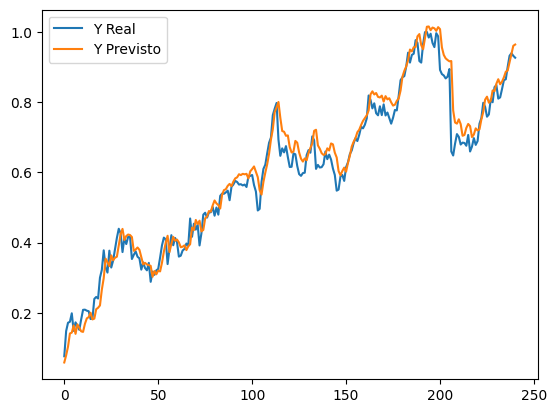

In [78]:
plt.plot(Y, label="Y Real")
plt.plot(Y_hat, label="Y Previsto")
plt.legend()
plt.show()

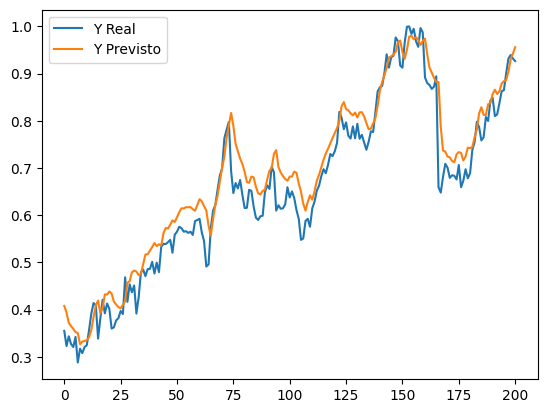

In [86]:
plt.plot(Y, label="Y Real")
plt.plot(Y_hat, label="Y Previsto")
plt.legend()
plt.show()